In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# 為了顯示的漂亮, 我刻意的把印出來的row只顯示15個和column只顯示10個
# 大家練習的時候可以去掉下面兩行
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 10)

In [3]:
# 使用scikit-learn提供的鳶尾花資料庫
iris = load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
df = df.drop(['sepal width (cm)', 'petal width (cm)'], axis=1)
df

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [5]:
#我們把我們擁有的資料集分成兩份,一份測試,一份訓練。
from sklearn.model_selection import train_test_split
data = df.drop(['target'], axis=1)
data_train, data_test, target_train, target_test = train_test_split(data, df['target'], test_size=0.1)

### Step1. 建立模型

我們使用sklearn的Perceptron來建造我們的感知器。這裡我並沒有調整過多的參數，目的只是為了讓你看看感知器是如何做出分類的。

In [6]:
from sklearn.linear_model import Perceptron
clf = Perceptron()
clf = clf.fit(data_train, target_train)

In [7]:
from sklearn.metrics import accuracy_score
predict = clf.predict(data_test)
print(f'預測：{list(predict)}')
print(f'正確標籤：{list(target_test)}')
print(f'正確率：{round(accuracy_score(target_test, predict) * 100, 2)}%')

預測：[1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 2, 1, 0, 0]
正確標籤：[1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0]
正確率：86.67%


### Step2. 畫出決策邊界

用剛剛的分類器畫出他的決策邊界

In [8]:
from mlxtend.plotting import plot_decision_regions # mlxtend:可以幫我們快速畫出分類線的函式庫
import numpy as np

C:\Users\Ace\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  "X does not have valid feature names, but"


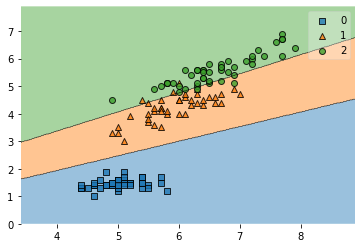

In [9]:
plot_decision_regions(X=np.array(data_train), y=np.array(target_train), clf=clf)

<H4> 單純貝氏擬合非線性的決策邊界（模擬橢圓形）

In [10]:
from sklearn.naive_bayes import GaussianNB

C:\Users\Ace\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


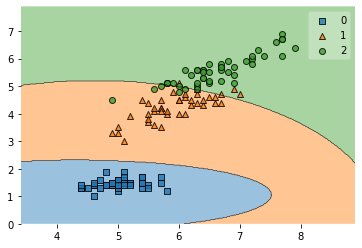

In [42]:
# 由於我們的特徵不是不連續的整數,我們必須使用GaussianNB
clf = GaussianNB()
clf = clf.fit(data_train, target_train)
plot_decision_regions(X=np.array(data_train), y=np.array(target_train), clf=clf)

<H4> 決策樹擬合非線性的決策邊界（多條直線切割模擬非線性分類）

C:\Users\Ace\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


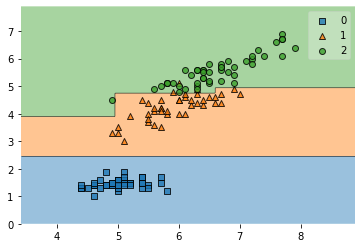

In [16]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4) #可以試試看從max_depth=1慢慢往上調整，觀看決策邊界的變化。
clf = clf.fit(data_train, target_train)
plot_decision_regions(X=np.array(data_train), y=np.array(target_train), clf=clf)

# 問題二：對於XOR(Exclusive OR)問題完全沒有辦法分類

![XOR問題](https://miro.medium.com/v2/resize:fit:720/format:webp/1*6J5oR2FyC2iPaF3zRiyNUQ.png)
<p style="text-align: center;">XOR問題</p>

In [17]:
from numpy import random

In [21]:
# 可以用numpy快速產生隨機, 第一個參數是你產生有多少種類，第二個參數是你要幾個。
x1 = random.choice([True, False], 100)
x1

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False,  True,
       False, False, False,  True, False, False,  True,  True,  True,
        True, False,  True, False,  True, False,  True, False,  True,
        True,  True,  True, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True, False,  True,
       False,  True,  True, False, False,  True,  True, False, False,
       False,  True, False, False, False,  True, False,  True,  True,
        True,  True, False,  True,  True, False,  True,  True, False,
        True, False, False, False,  True, False, False,  True, False,
        True])

In [22]:
x2 = random.choice([True, False], 100)
x2

array([ True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True, False, False, False, False, False, False,  True,
        True,  True,  True, False,  True,  True, False, False,  True,
       False, False, False,  True, False, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False, False, False,  True, False,  True,
       False, False,  True,  True, False,  True, False, False,  True,
       False, False, False, False, False,  True,  True, False,  True,
        True, False, False,  True, False, False, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
        True, False,  True,  True, False, False, False, False,  True,
       False])

In [31]:
# y是我們的target,你可以想像成會不會喜歡。
y = np.logical_xor(x1, x2)
df = pd.DataFrame(columns = ['x1', 'x2', 'y'])
df['x1'] = x1
df['x2'] = x2
df['y'] = y
df = df.astype(int)
df

,x1,x2,y
0,1,1,0
1,1,1,0
2,0,1,1
3,1,1,0
4,1,1,0
...,...,...,...
95,0,0,0
96,0,0,0
97,1,0,1
98,0,1,1


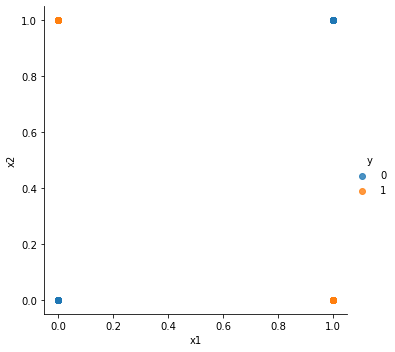

In [35]:
import seaborn as sns
sns.lmplot(x='x1', y='x2', hue='y', data=df, fit_reg=False)

C:\Users\Ace\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  "X does not have valid feature names, but"


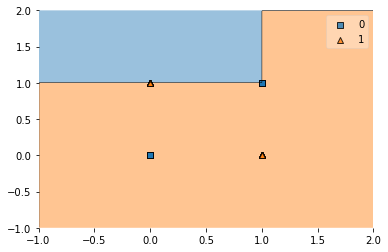

In [43]:
clf = Perceptron()
clf.fit(df.drop(['y'], axis=1), df['y'])
plot_decision_regions(X=np.array(df.drop(['y'], axis=1)), y=np.array(df['y']), clf=clf)